In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604–9–2-local_9.2.88–1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604–9–2-local_9.2.88–1_amd64.deb
!apt-key add /var/cuda-repo-9–2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2022-10-15 07:26:23--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2022-10-15 07:26:23--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?ptbkXtnGti24RfVejnBEID4WvfqVZvAr8s15-KM0yEJYV6_9Vz9YYaNhchtRgU3LI1XId6q7OeJpFWAIcYBQDcgfHkVrHgG7MCa2peFzMnLOS

In [4]:
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 467 kB 34.1 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=2a995e973e613c333853431a83e65a305f422fe67bf0a75631a8c4c159e45f66
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric


In [5]:
!python --version

Python 3.7.14


In [6]:
!python -c "import torch; print(torch.__version__)"

1.12.1+cu113


In [7]:
!python -c "import torch; print(torch.version.cuda)"

11.3


In [8]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 7.9 MB 35.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 3.5 MB 34.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Data Loading** 
---

 ▶  Question1

We want to load citeseer dataset


**The CiteSeer dataset consists of 3327 scientific publications classified into one of six classes. The citation network consists of 9104 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary.**

Citeseer dataset is a subset of the Planetoid dataset so we need to import Planetoid first to use Citeseer.

*dloader* function prints some properties of this graph.  

In [10]:
from torch_geometric.datasets import Planetoid
from torch_geometric.data import Data

dataset = Planetoid(root='/tmp/Citeseer', name='Citeseer')
def dloader(dataset): 
  print("Number of classes :",dataset.num_classes)
  print("Number of node features:",dataset.num_node_features)
  print("Number of Graphs:",len(dataset))
  data=dataset[0]
  print('Number of nodes:', data.num_nodes)
  print('Number of edges:', data.num_edges)
  print('Average node degree:', (2*data.num_edges) / data.num_nodes)
  print('Number of training nodes: ',data.train_mask.sum().item())
  print('Is undirected:', {data.is_undirected()})
  return
dloader(dataset)

Processing...


Number of classes : 6
Number of node features: 3703
Number of Graphs: 1
Number of nodes: 3327
Number of edges: 9104
Average node degree: 5.472798316801923
Number of training nodes:  120
Is undirected: {True}


Done!




---

 ▶  Question2


**Every graph in PYG is represnted by a Data object holding some information about the graph.**

**Here this data object holds 6 attributes consisting of :**

Nodes mean scientific publications and edges mean citation relationships. Each node has a predefined feature with 3703 dimensions. The dataset is designed for the node classification task. 

*    The `Edge_index` property holds the information about the edges i.e a 
tensor of source and target nodes of a graph.


* `X` (each of the 3327 nodes is assigned a 3703-dim feature vector)


*  **Node labels** as `y` (each node is assigned to exactly one class).


 There also exists some additional attributes called
: 

>  `Train_mask`, describes for which nodes we already know their class. 
 Mask is a tensor of false and true values showing the related elements to   these parts.


>  `Val_mask`, describes a portion of data we know their class and we use to 
  validate our model and to optimize our hyperparametes .

> `Test_mask`, describes a portion of data we  know their class 
  and we use to test our model accuracy.

The `data` object also provides some **utility functions** to infer some basic properties of the underlying graph.
recognizing isolated nodes in the graph (*i.e.* there exists no edge to any node), self-loops (*i.e.*, $(v, v) \in \mathcal{E}$), or whether the graph is undirected (*i.e.*, for each edge $(v, w) \in \mathcal{E}$ there also exists the edge $(w, v) \in \mathcal{E}$).

In [11]:
data=dataset[0]
print(data)

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])



> *data.edge_index.T*



**Is a tensor of all edges represnting source and target of the edges**


In [20]:
data.edge_index.T

tensor([[   0,  628],
        [   1,  158],
        [   1,  486],
        ...,
        [3324, 2820],
        [3325, 1643],
        [3326,   33]])

▶ Question 3




*   *show_edges()* function iterates on *edges_index* tensor to find the items whose source element matches the intended index and prints them as a list item



In [12]:
d=data.edge_index.T
def show_edges(i):
  for item in data.edge_index.T:
    if (item[0] == i):
      print(item.tolist())

show_edges(1)

[1, 158]
[1, 486]
[1, 1097]
[1, 2919]
[1, 2933]


###**Visulization**

▶ Question 4

**Using the networkx library we get the graph and convert it to a networkx graph then we draw the graph using the labels as node classes. From the function in question 1 we can see that the graph is undirected.**



In [24]:

%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt


def visualize(h, color):
    plt.figure(figsize=(50,50))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

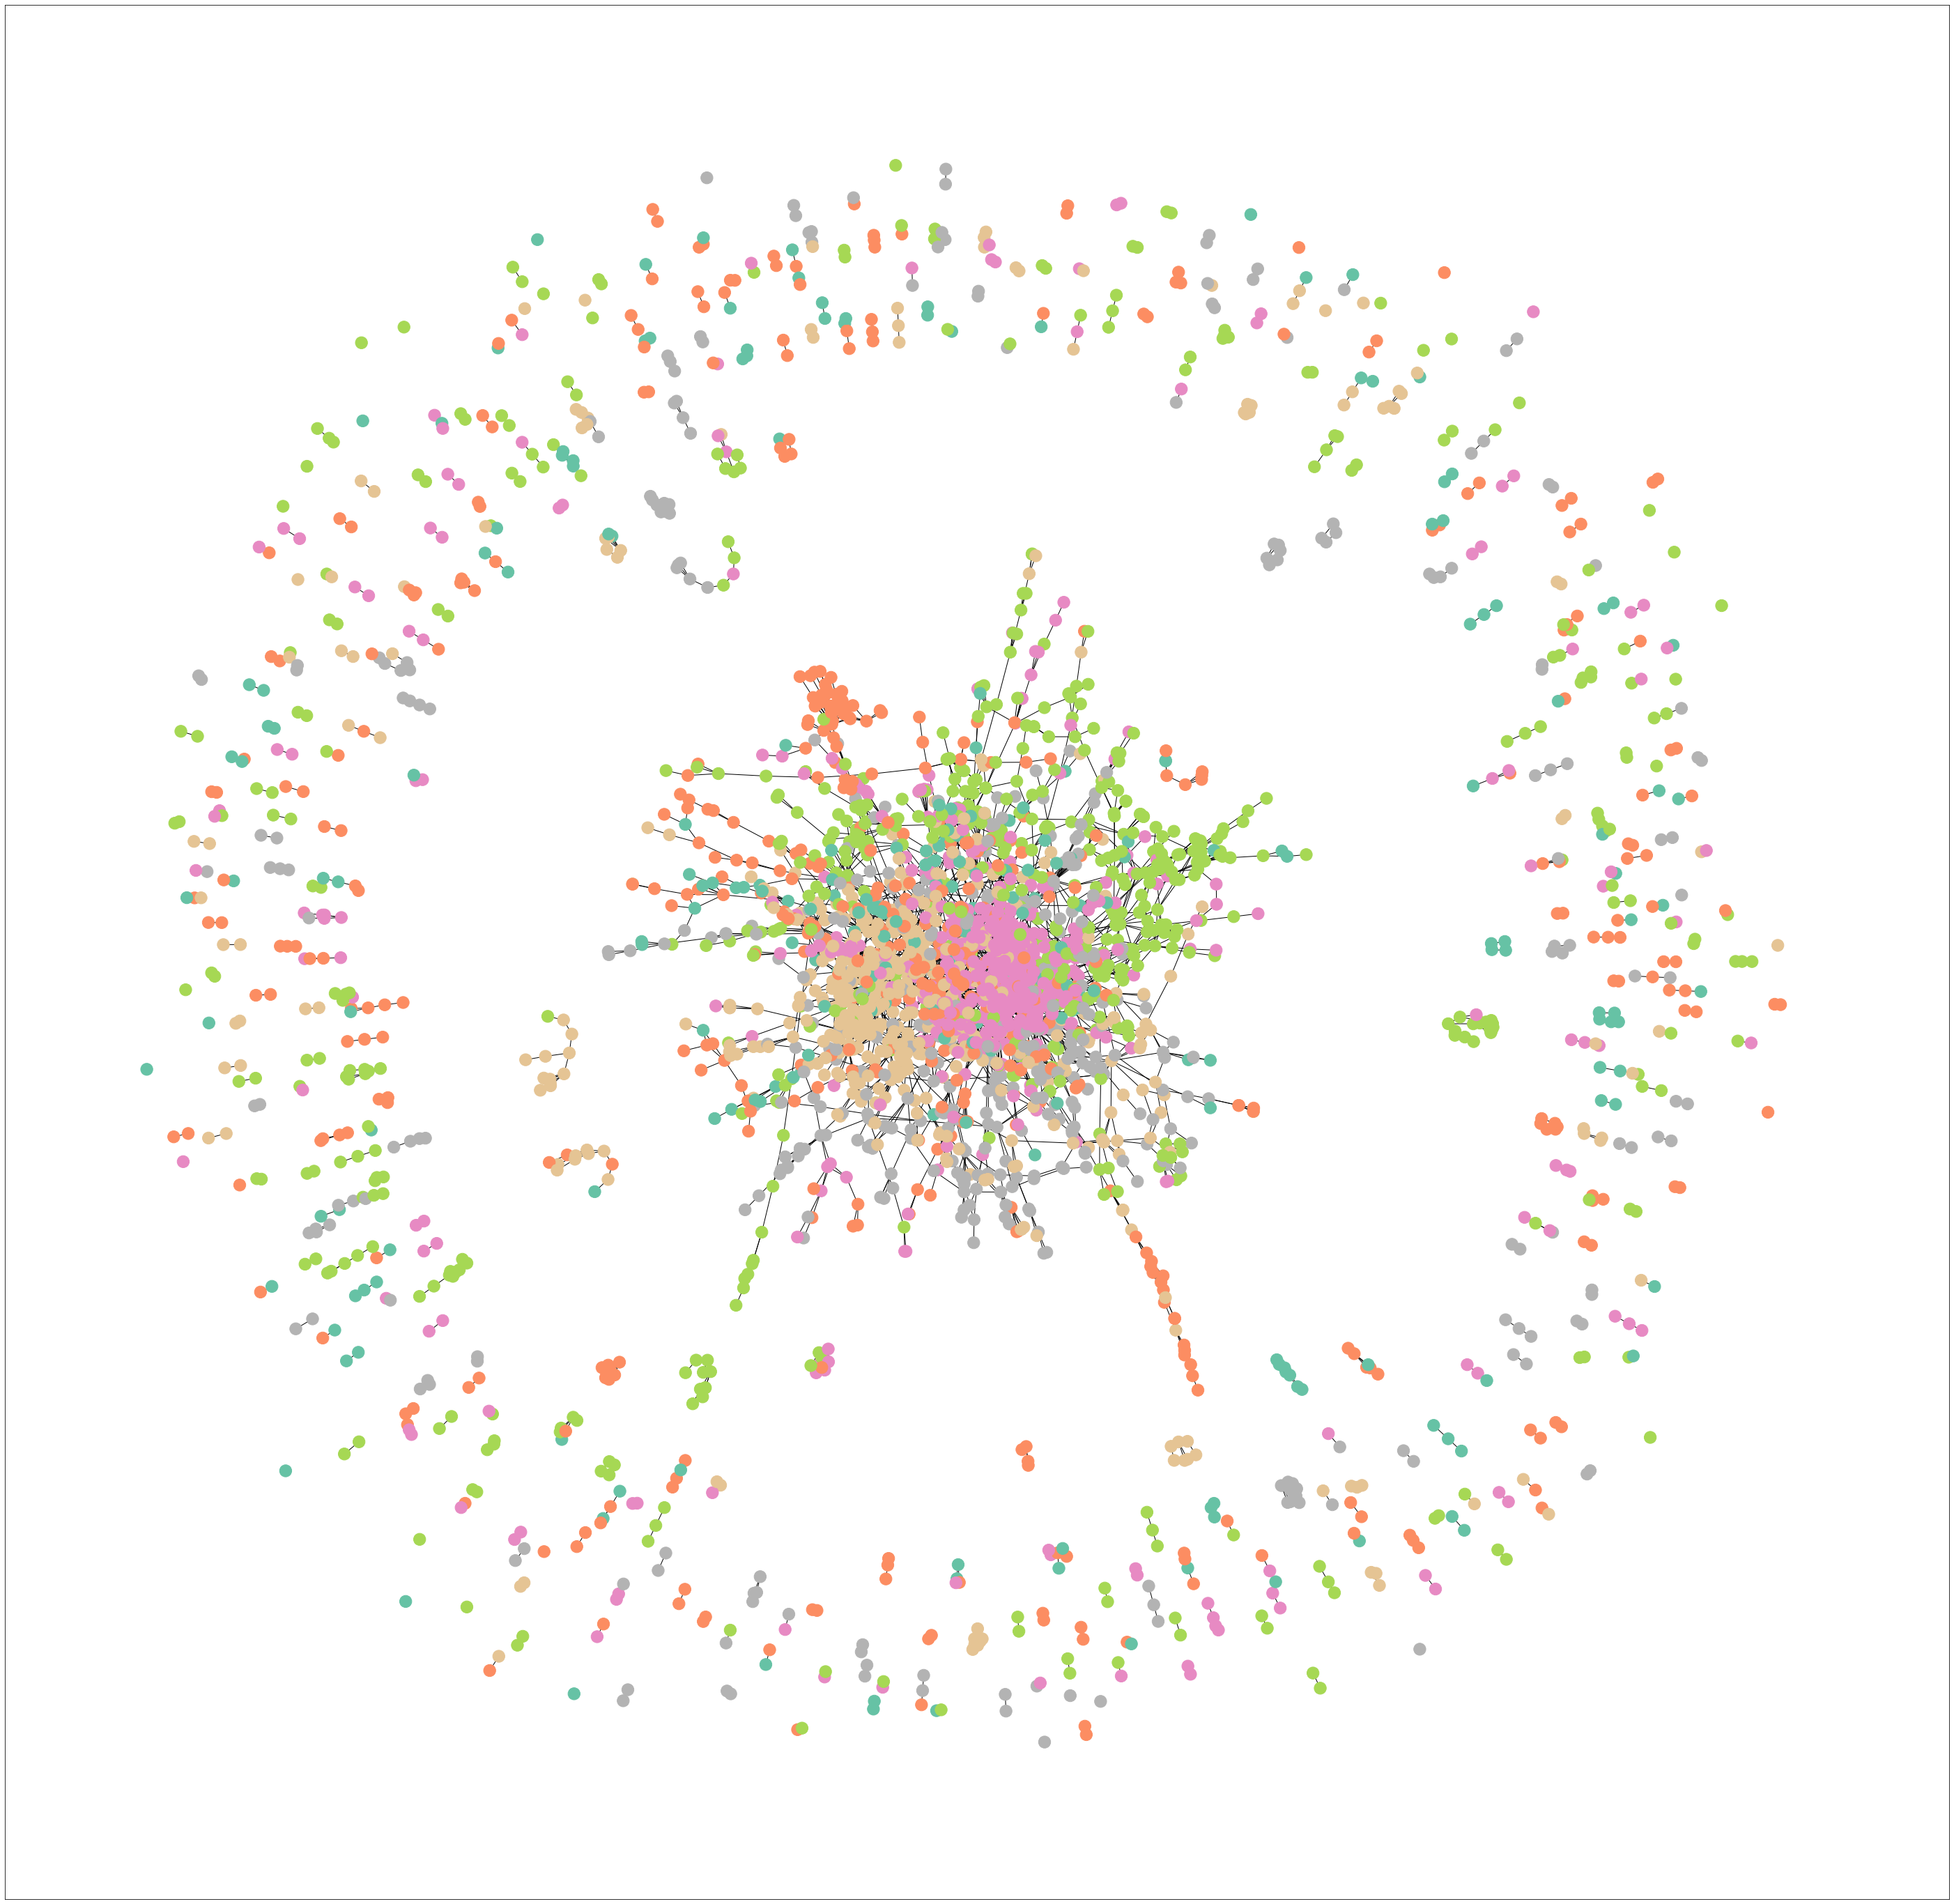

In [25]:
from torch_geometric.utils import to_networkx
G = to_networkx(data, to_undirected=True)

visualize(G, color=data.y)

▶ Question 5


**We define the layers in the constructor part of the class GCN .**

**Here we define a convolution layers with the input of neuron numbers and the number of node features**



*   The first layer tranforms 3703 input features to a hidden size of 16 

*   The classfication layer transforms the hidden channels to  6 number of 
classes

* The model structure is defined in forward function.




In [26]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.classifier = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        out= self.classifer(x)
        return out,x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(3703, 16)
  (classifier): Linear(in_features=16, out_features=6, bias=True)
)
